In [72]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["figure.dpi"] = 100

In [74]:
# Load the dataset
file_path = 'Algorithms/training_data.csv'
data = pd.read_csv(file_path)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# Display the first few rows of the dataframe
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock,increase_stock_binary
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand,0


# High demand
The histograms shows the number of observed instances of high demand, given some variable in the x-axis.

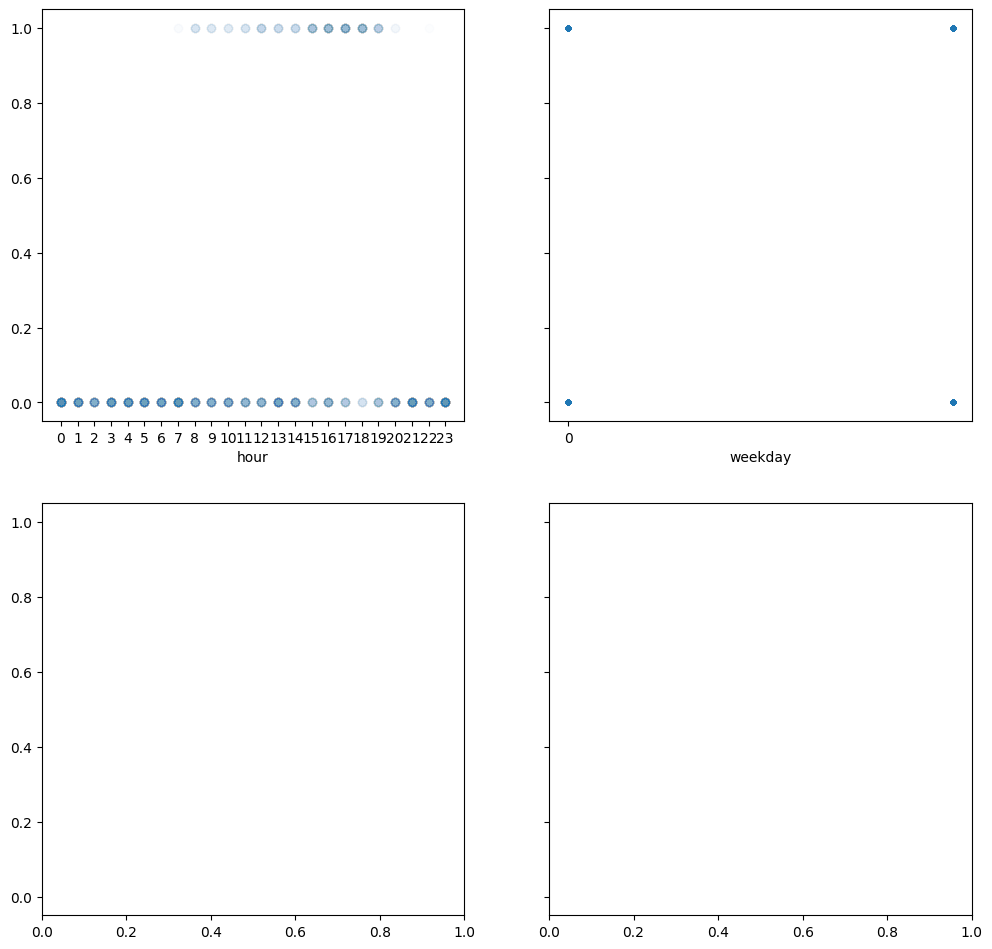

In [106]:
# hours, weeks, months

temporal_data = data[["hour_of_day", "weekday", "month", "increase_stock_binary"]]

hour = temporal_data["hour_of_day"].to_numpy()
weekday = temporal_data["weekday"].to_numpy()
month = temporal_data["month"].to_numpy()
demand = temporal_data["increase_stock_binary"].to_numpy()

fig, ax = plt.subplots(2,2,figsize=[12,12],dpi=100,sharey=True)
ax[0,0].plot(hour, demand, "o", alpha=0.01)
ax[0,0].set_xlabel("hour")
ax[0,0].set_xticks(np.arange(0, 24))

ax[0,1].plot(weekday, demand, ".")
ax[0,1].set_xlabel("weekday")
ax[0,1].set_xticks(np.arange(0, 1))
plt.show()

In [ ]:
temporal_data = data[["hour_of_day", "weekday", "month", "increase_stock_binary"]]

hour = temporal_data["hour_of_day"].to_numpy()
weekday = temporal_data["weekday"].to_numpy()
month = temporal_data["month"].to_numpy()
demand = temporal_data["increase_stock_binary"].to_numpy()


P_cond_low = (hour[:,None] == np.arange(24)) * (demand[:,None] == 0) 
P_cond_low = P_cond_low.astype(float)



P_cond_high = (hour[:,None] == np.arange(24)) * (demand[:,None] ==1) 
P_cond_high = P_cond_high.astype(float)

sns.barplot(x=np.arange(24), y=P_cond_low.mean(0))
plt.xlabel("hour"), plt.ylabel("P(low demand|hour)")
plt.show()
sns.barplot(x=np.arange(24), y=P_cond_high.mean(0))
plt.xlabel("hour"), plt.ylabel("P(high demand|hour)")

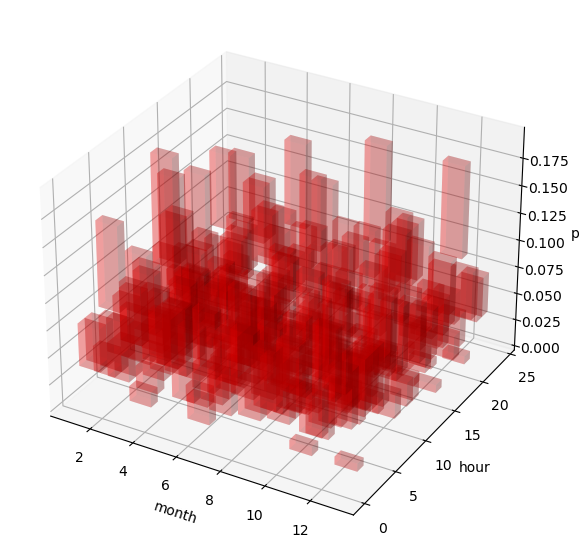

In [86]:
temporal_data = data[["hour_of_day", "weekday", "month", "increase_stock_binary"]]
temporal_data.head()
hour = temporal_data["hour_of_day"].to_numpy()
# weekday = temporal_data["weekday"].to_numpy()
# month = temporal_data["month"].to_numpy()
demand = temporal_data["increase_stock_binary"].to_numpy()
p_total=[]
for i in range (1,13):
    hour = temporal_data[temporal_data["month"]==i]["hour_of_day"].to_numpy()
    demand = temporal_data[temporal_data["month"]==i]["increase_stock_binary"].to_numpy()
    P_cond_low = (hour[:,None] == np.arange(24)) * (demand[:,None] == 0) 
    P_cond_low = P_cond_low.astype(float)
    p_total.append(P_cond_low.mean(0))
p_total=np.array(p_total)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制三维散点图
# ax.scatter(np.arange(12), np.arange(24), p_total)

# ax.bar3d(np.arange(1,13).repeat(24), np.tile(np.arange(24), 12), \
#            (p_total).flatten(), c=(p_total).flatten(), cmap='Reds', s=(p_total).flatten()*200, marker='o')

ax.bar3d(np.arange(1,13).repeat(24), np.tile(np.arange(24), 12), \
           (p_total).flatten(), dx=1,dy=1,dz=(p_total).flatten(),\
                color='r', alpha=0.2, zsort='average')

#dx是柱子的宽度，dy是柱子的深度，dz是柱子的高度,zsort是柱子的排序规则，average表示按照z轴的均值排序

# 设置坐标轴标签
ax.set_xlabel('month')
ax.set_ylabel('hour')
ax.set_zlabel('p')

# 显示图形
plt.show()
    

In [60]:
p_total



array([[0.0390625 , 0.0390625 , 0.0234375 , 0.078125  , 0.03125   ,
        0.0390625 , 0.03125   , 0.0546875 , 0.046875  , 0.015625  ,
        0.0234375 , 0.046875  , 0.078125  , 0.03125   , 0.0390625 ,
        0.015625  , 0.0703125 , 0.0390625 , 0.015625  , 0.03125   ,
        0.0703125 , 0.0234375 , 0.015625  , 0.0625    ],
       [0.04580153, 0.03053435, 0.03053435, 0.05343511, 0.03053435,
        0.05343511, 0.03053435, 0.03816794, 0.09923664, 0.06870229,
        0.06870229, 0.03816794, 0.04580153, 0.04580153, 0.01526718,
        0.00763359, 0.02290076, 0.02290076, 0.01526718, 0.03816794,
        0.03816794, 0.        , 0.05343511, 0.05343511],
       [0.06122449, 0.01360544, 0.02040816, 0.02721088, 0.04081633,
        0.02721088, 0.03401361, 0.04081633, 0.04761905, 0.04761905,
        0.02040816, 0.03401361, 0.03401361, 0.04081633, 0.03401361,
        0.04761905, 0.05442177, 0.01360544, 0.01360544, 0.        ,
        0.04761905, 0.04761905, 0.03401361, 0.04081633],
       [0.064

In [181]:
P_cond_low.mean(0).sum()

0.8200000000000001

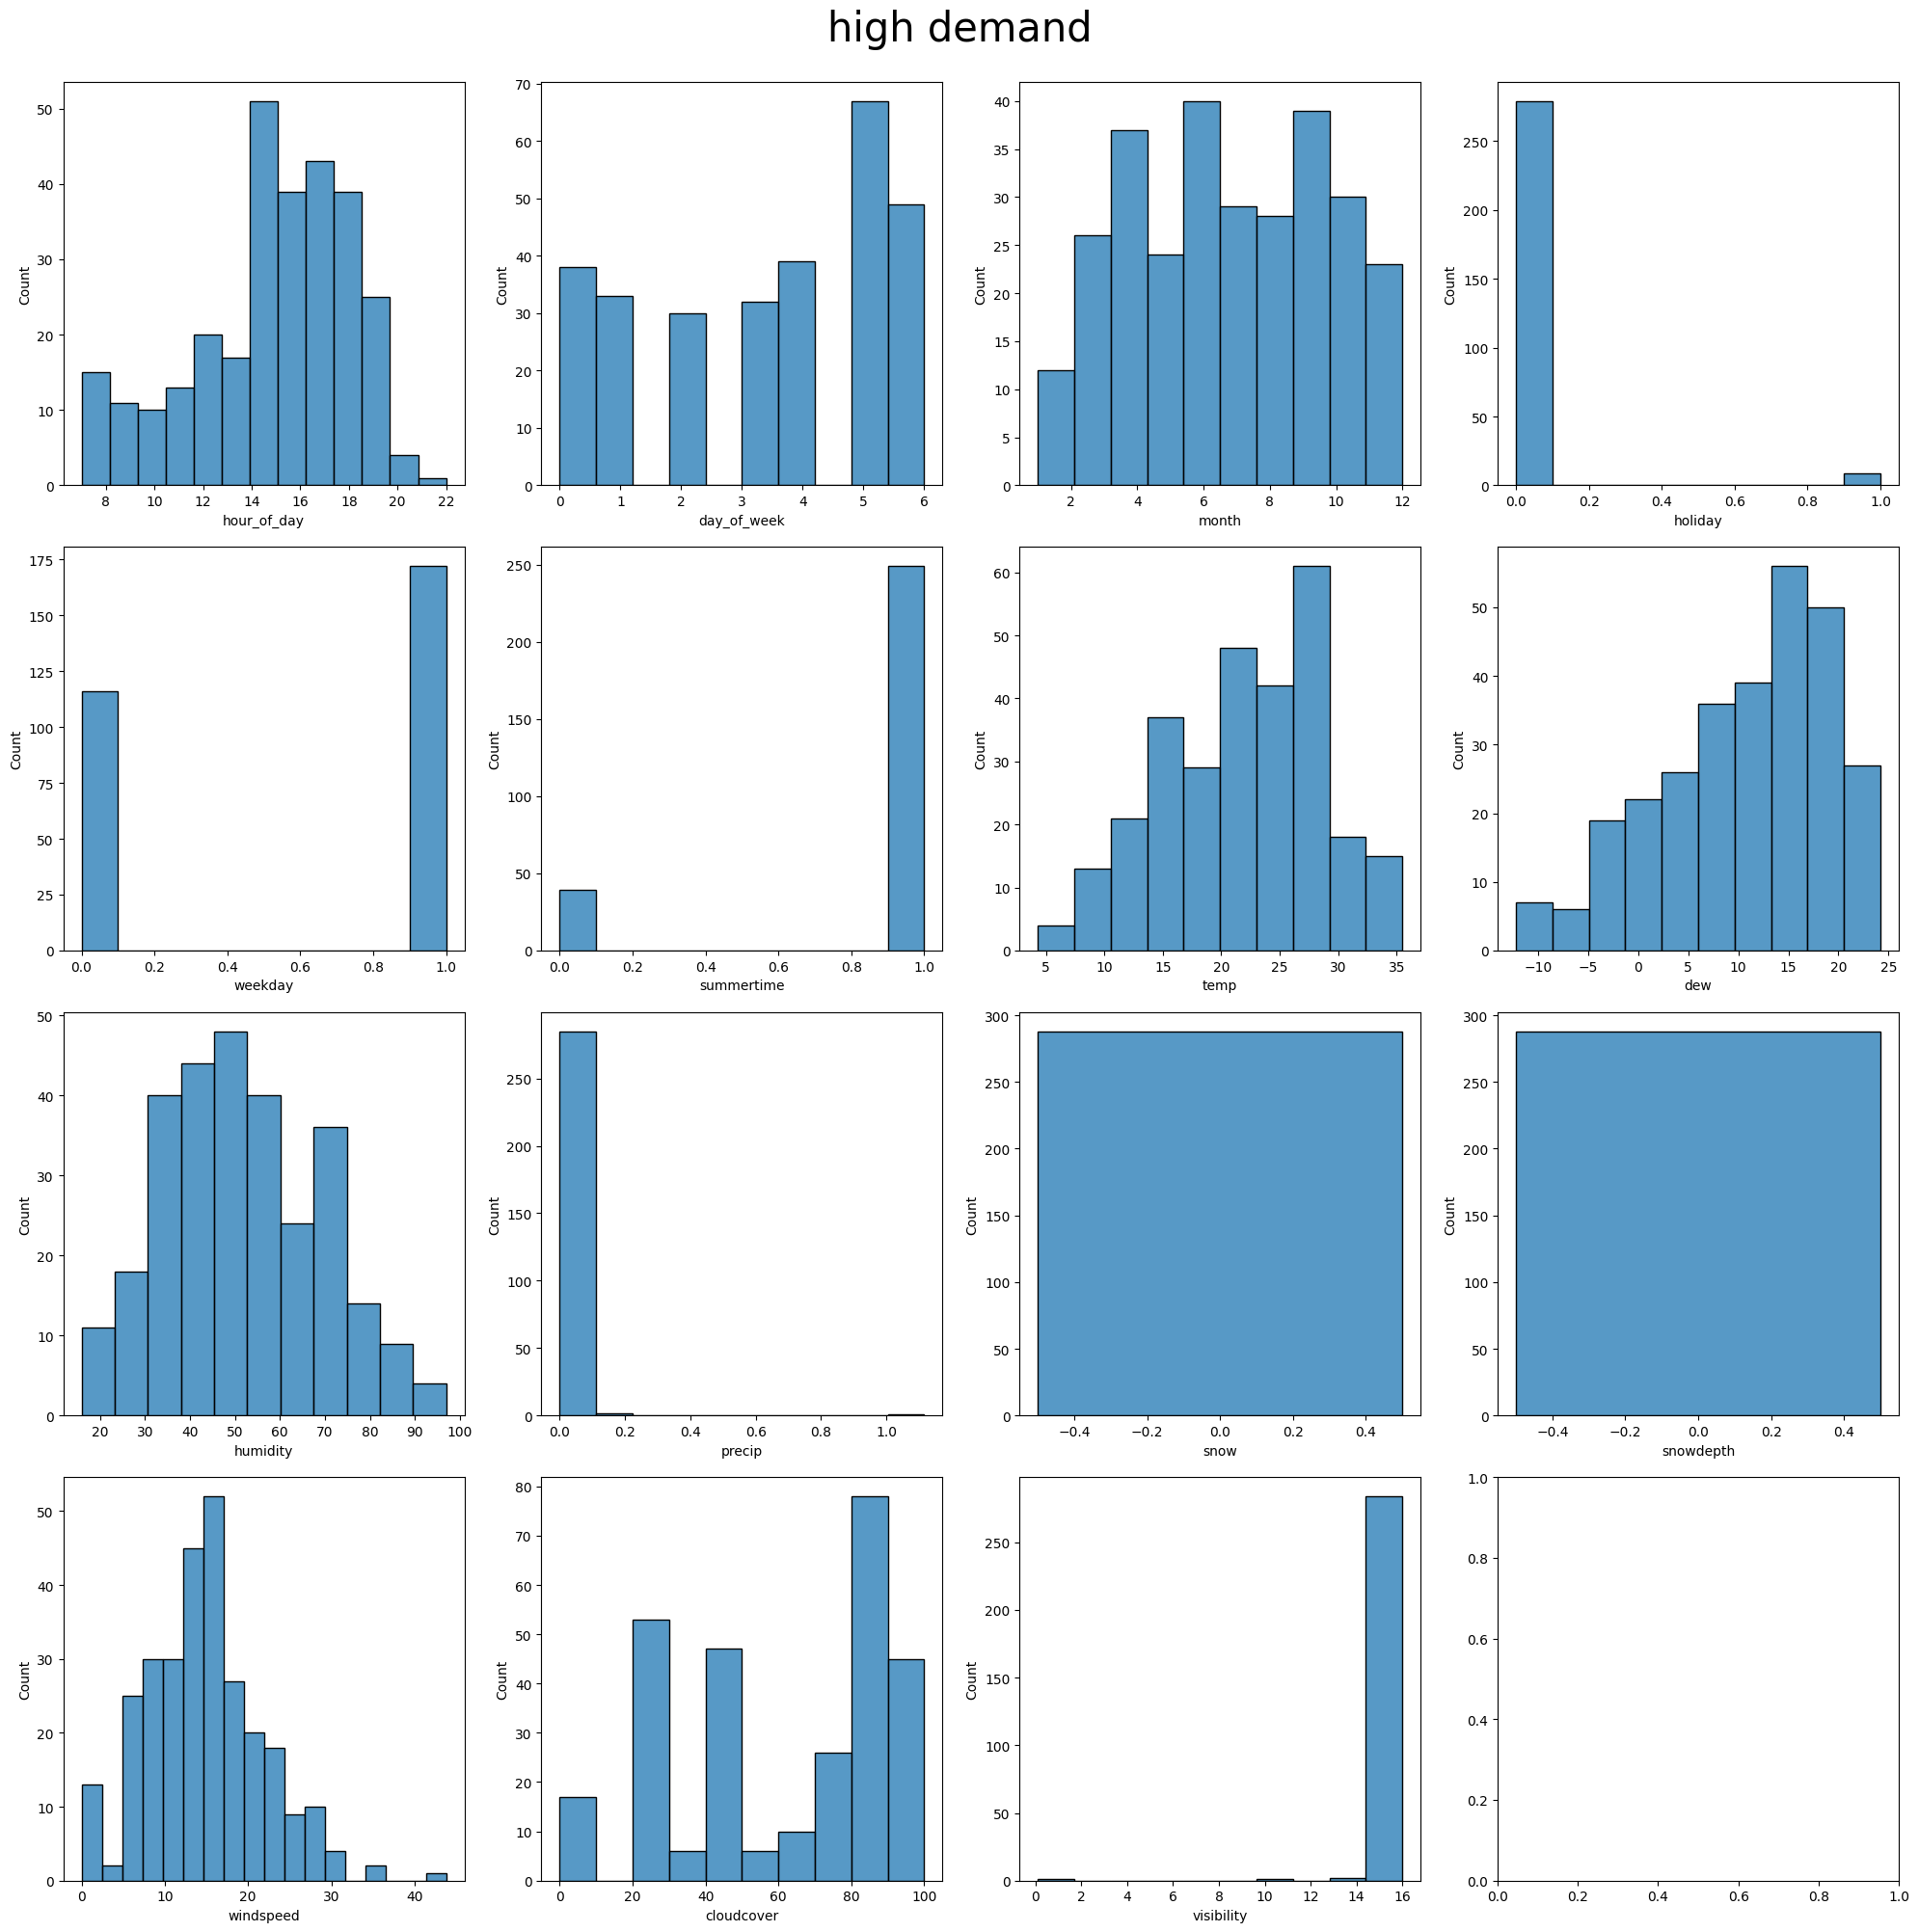

In [14]:
# Filtering the data for only high bike demand (binary label = 1)
high_demand_data = data[data['increase_stock_binary'] == 1]

# Plotting the distribution of each feature for high bike demand
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("high demand", y=1, fontsize=30)
for i, col in enumerate(high_demand_data.columns[:-2]): # excluding the last two columns (original and binary labels)
    sns.histplot(high_demand_data[col], bins="auto", ax=axes[i], kde=False)

plt.tight_layout()
plt.show()

# Low demand
The histograms shows the number of observed instances of low demand, given some variable in the x-axis.

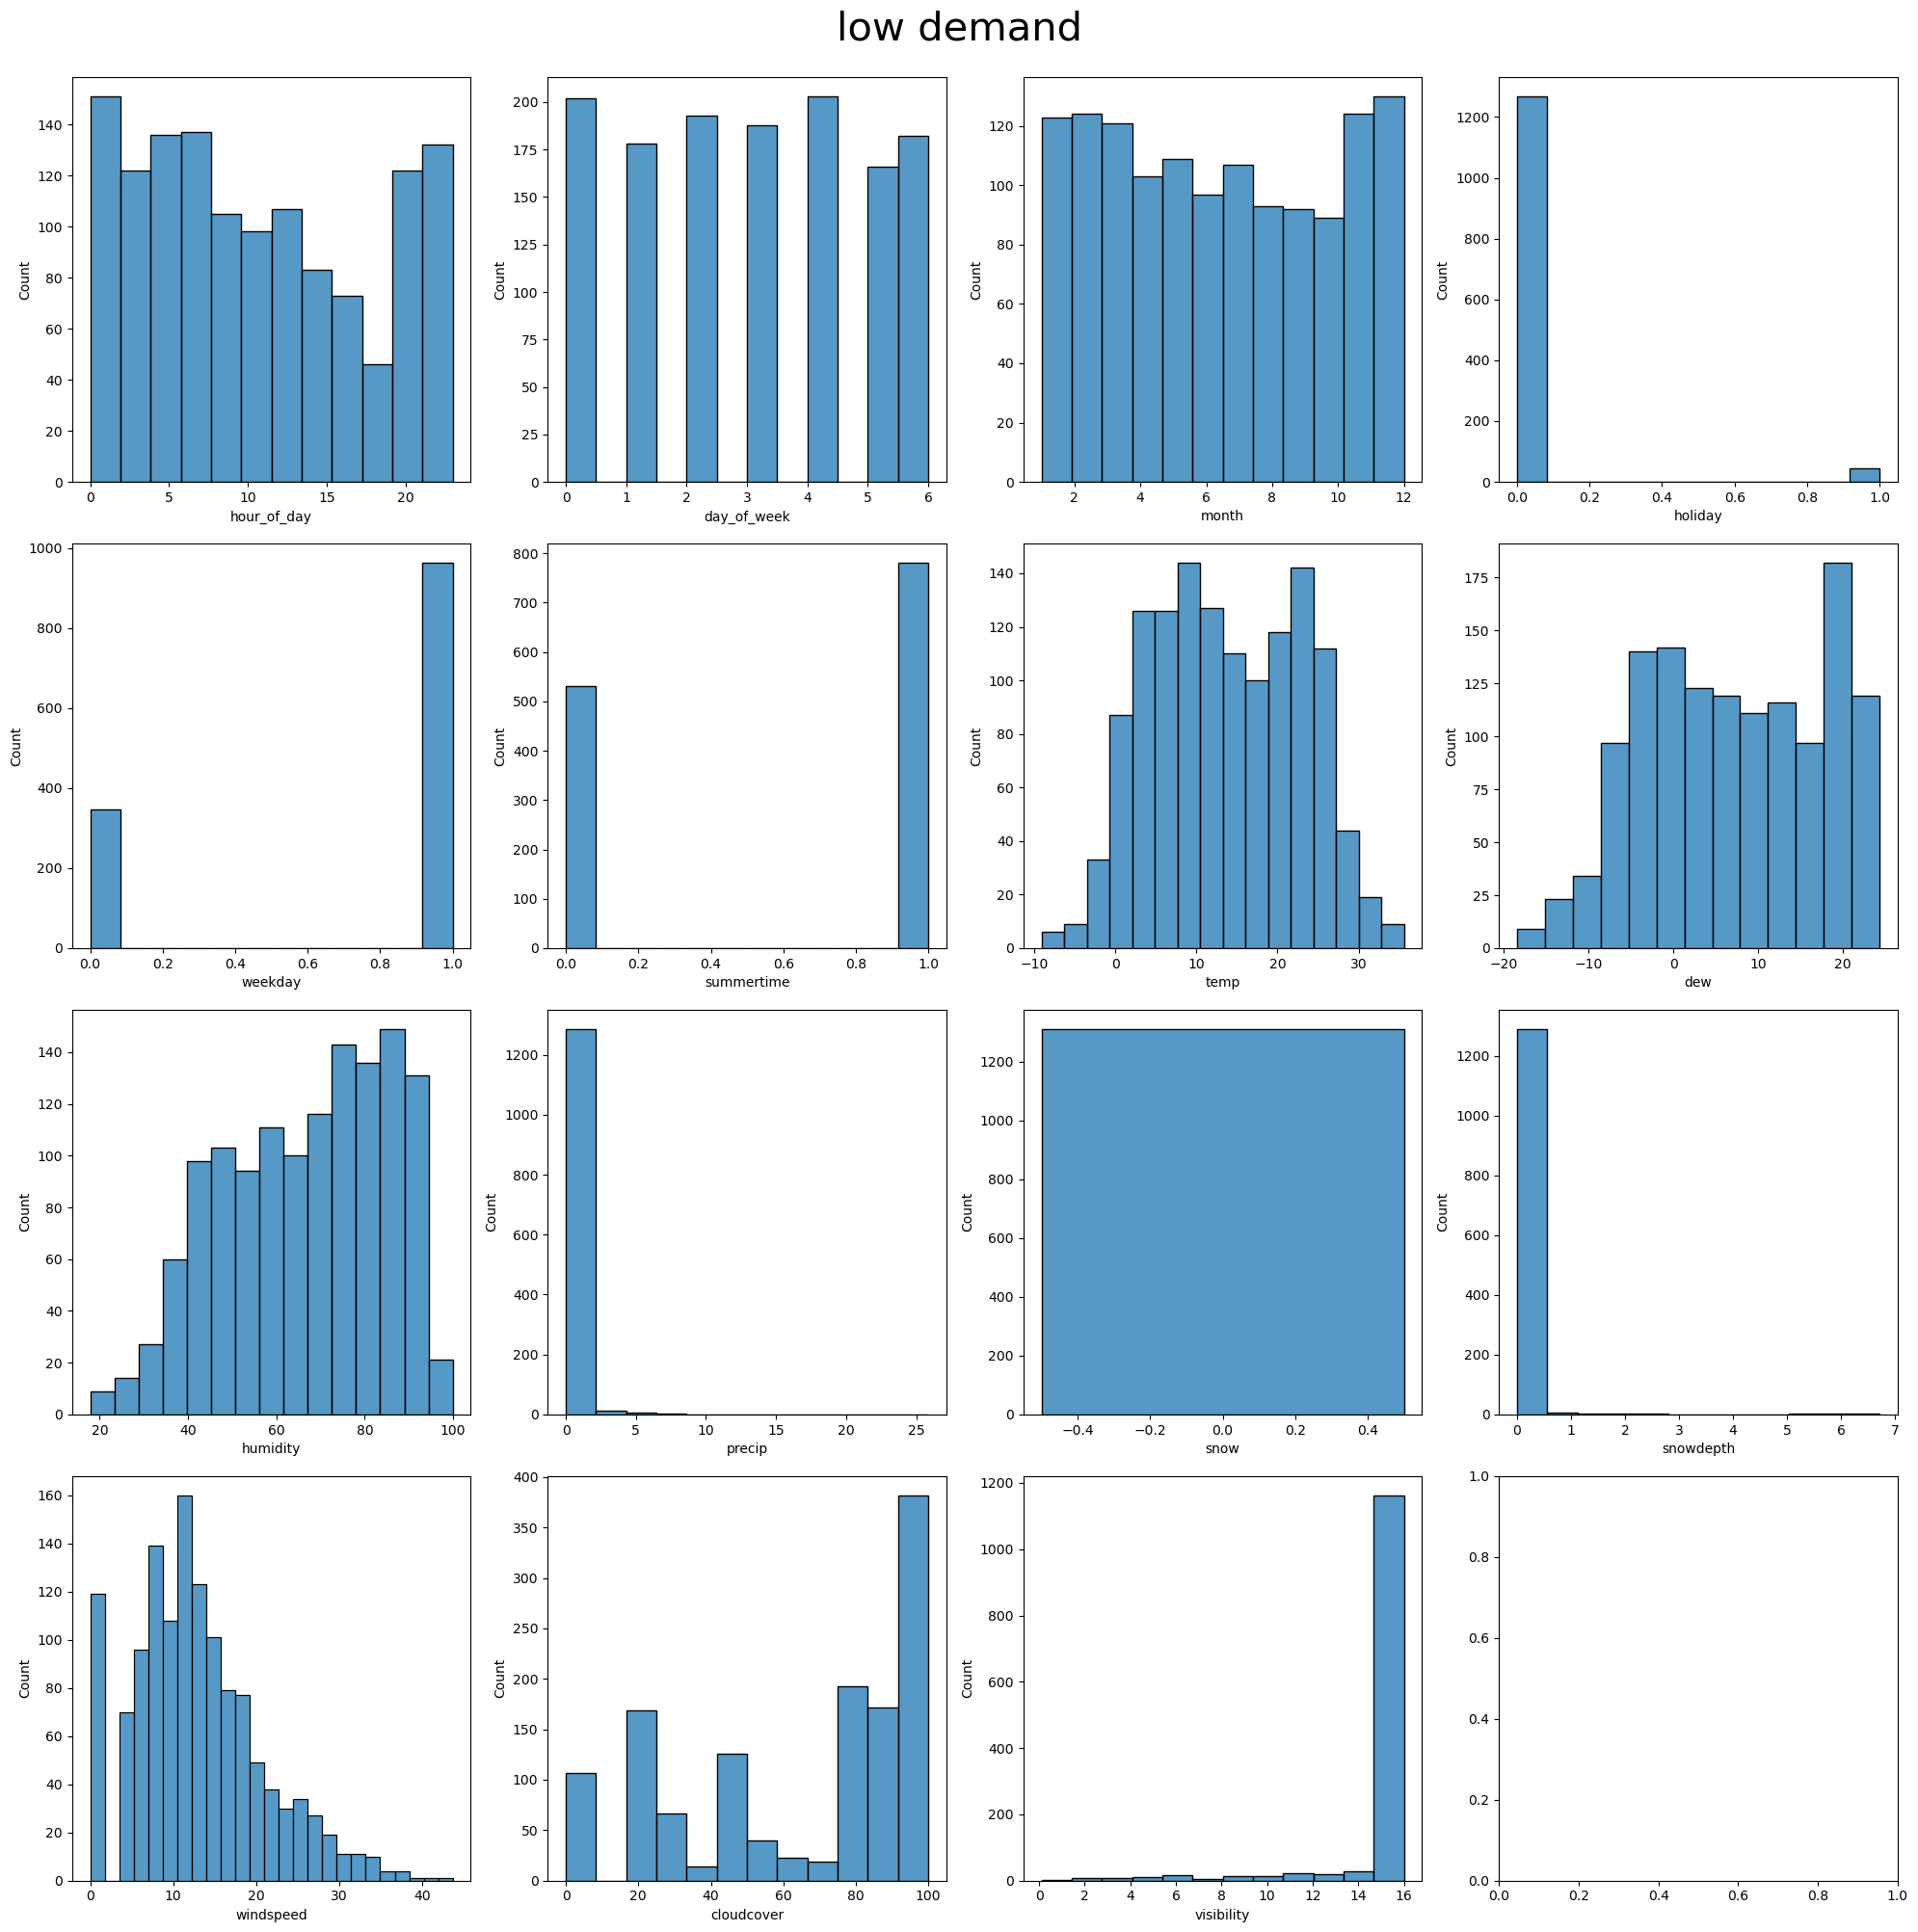

In [12]:
low_demand_data = data[data['increase_stock_binary'] == 0]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("low demand", y=1, fontsize=30)
for i, col in enumerate(low_demand_data.columns[:-2]): # excluding the last two columns (original and binary labels)
    sns.histplot(low_demand_data[col], bins="auto", ax=axes[i], kde=False)

plt.tight_layout()
plt.show()

# Plotting low and high demand together
1 = high demand \
0 = low demand

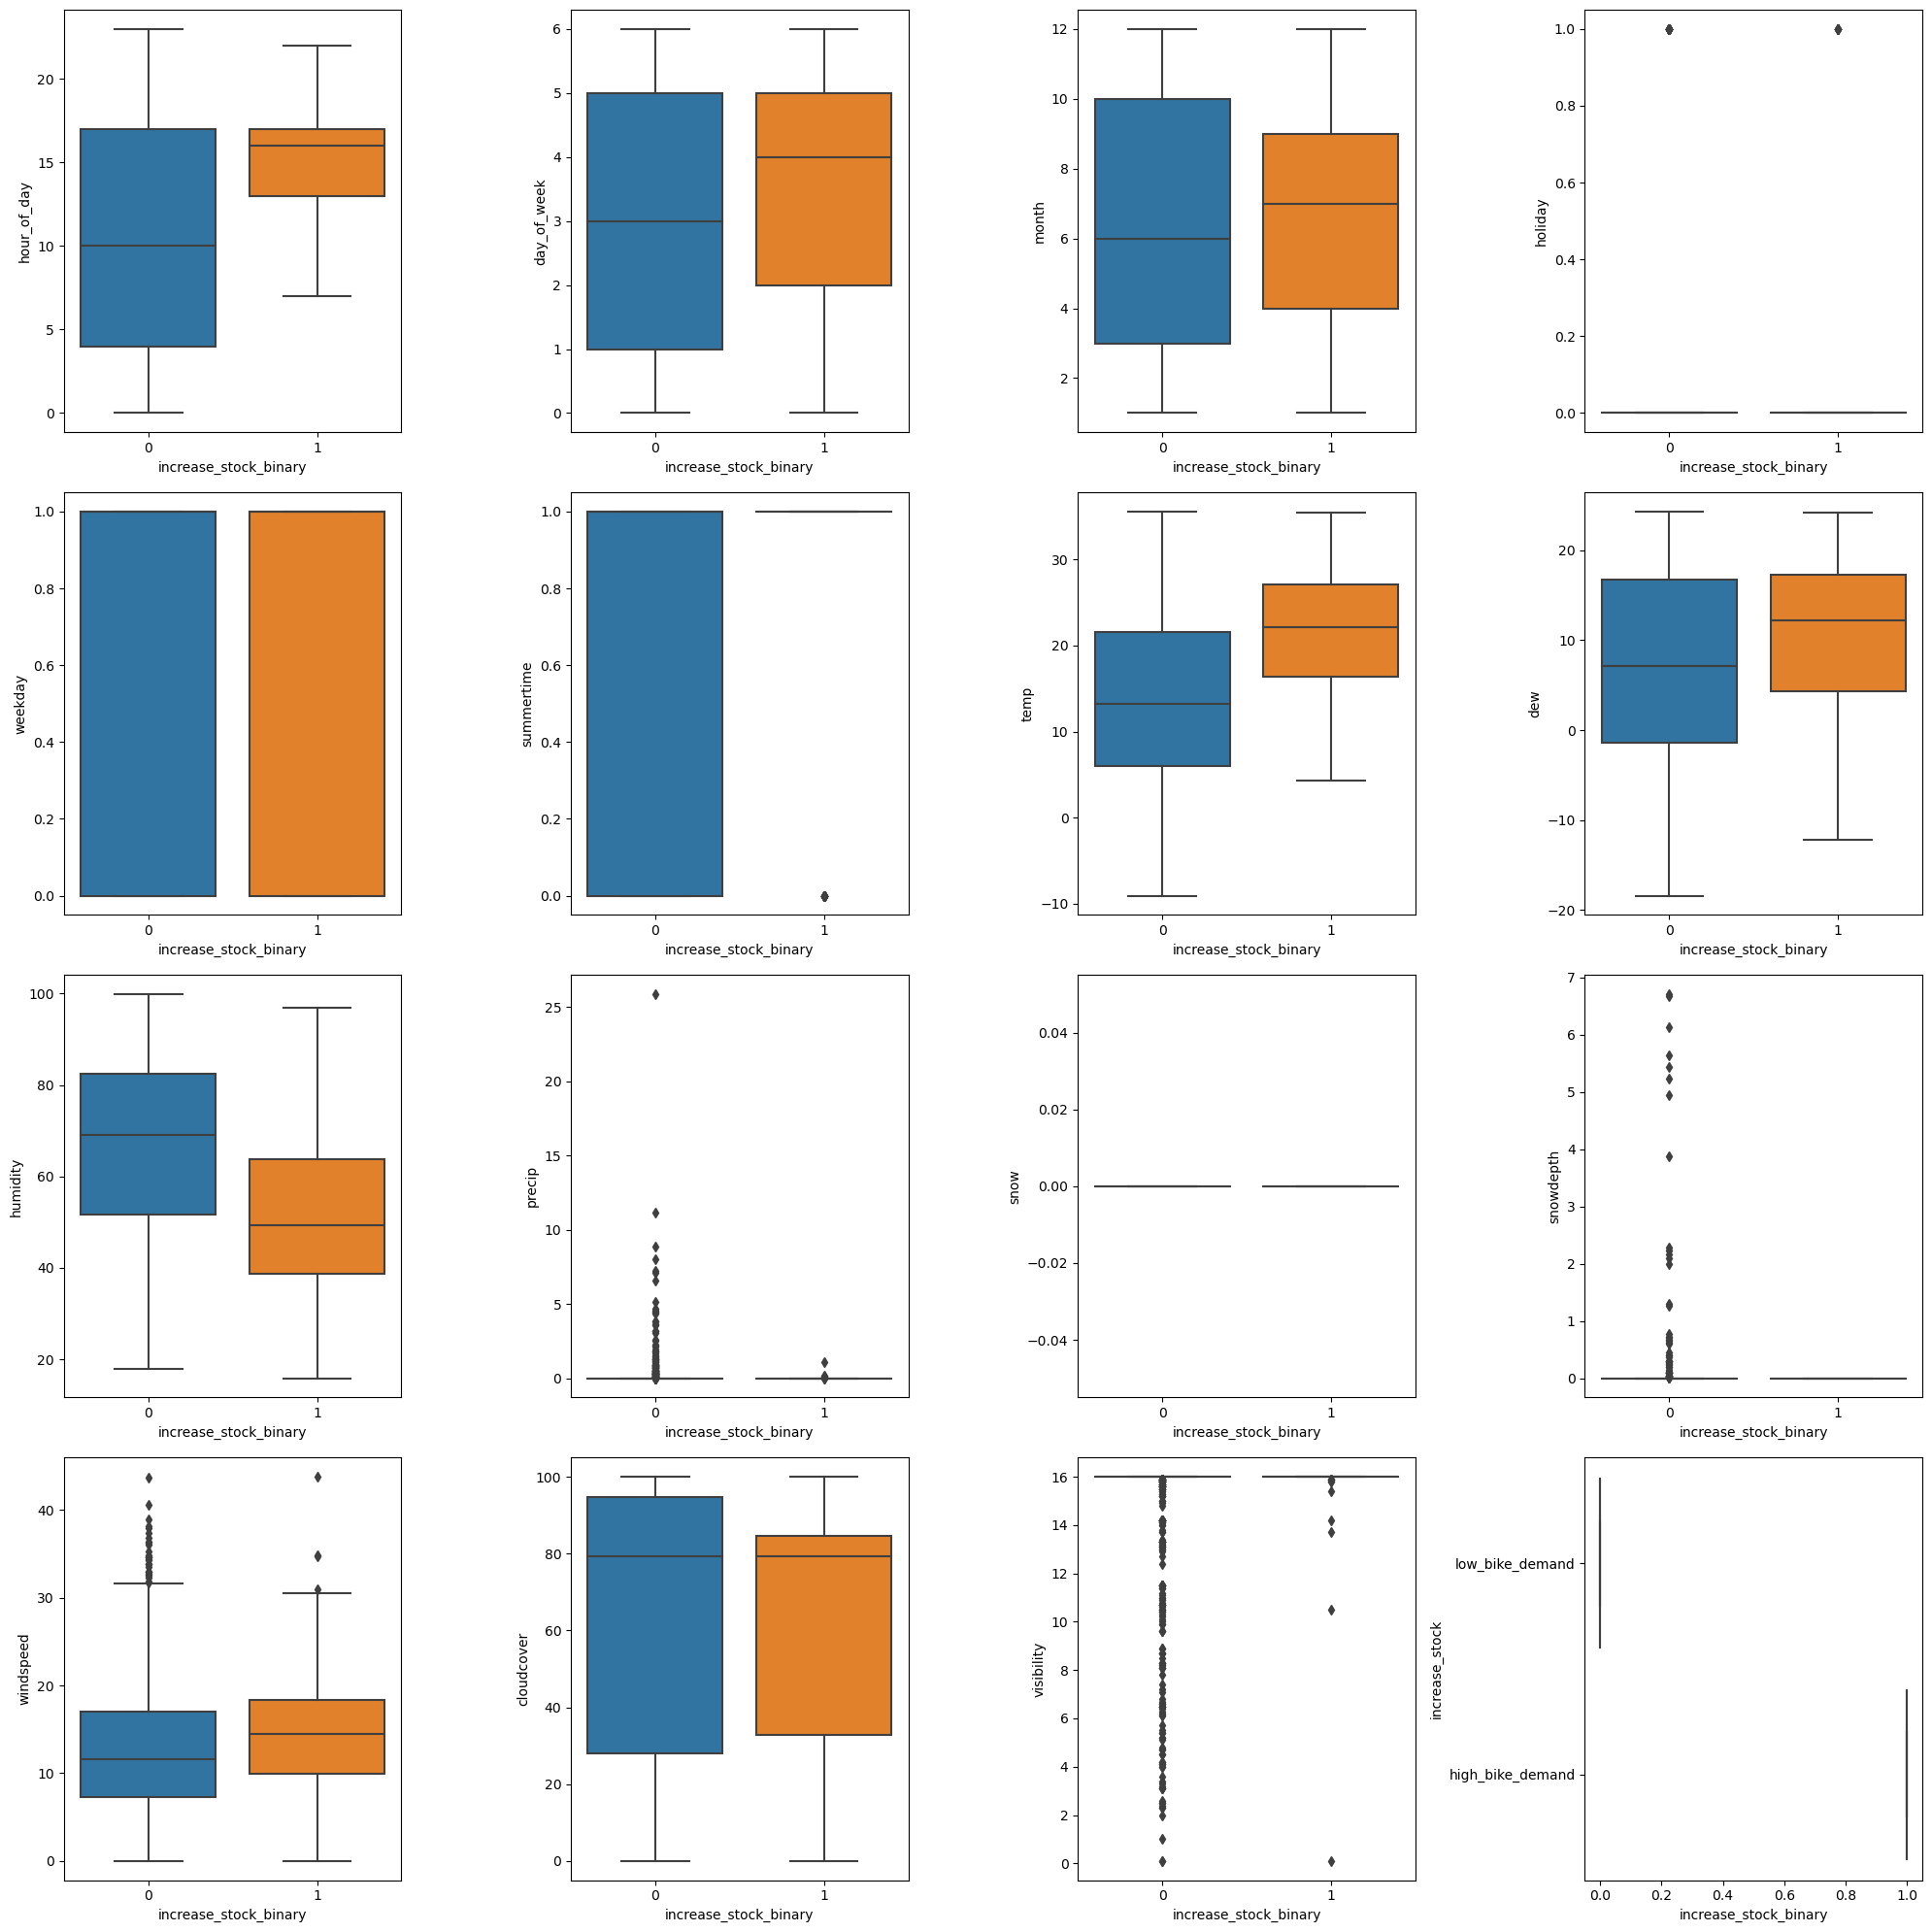

In [5]:
# Convert the 'increase_stock' column to binary for plotting, 

# Plotting correlations between inputs and the binary label
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns[:-1]): # excluding the last column which is the binary label
    sns.boxplot(x='increase_stock_binary', y=col, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

## Observations
1. The increase for demand ishighest in the interval 15:00 - 19:00.
2. Friday is a high demand day.
3. The months has some influence. 
4. Demand is very high when it is not , but slightly higher 
5. 